In [1]:
import datetime

import pandas as pd
from synutility.SynIO.data_type import load

from src.functions import *
from src.invariants import *

import matplotlib.pyplot as plt

In [2]:
# data = load('data/ITS_graphs.pkl.gz')
data = load('data/ITS_largerdataset.pkl.gz')

In [3]:
# R_ID_KEY = 'R-id'  # used in small dataset
R_ID_KEY = 'R_ID'  # used in big dataset

In [4]:
invariant_functions = {
    "no_invariant": no_invariant,
    # "vertex_count": vertex_count,
    # "edge_count": edge_count,
    # "vertex_degrees": vertex_degrees,
    # "rank": rank,
    # "algebraic_connectivity": algebraic_connectivity,
    # "edge_label_histogram": edge_label_histogram,
    "node_label_histogram": node_label_histogram,
    "node_label_with_edges_histogram": node_label_with_edges_histogram,
    "edge_label_with_nodes_histogram": edge_label_with_nodes_histogram,
    "weisfeiler_lehman_graph_hash_(1)": lambda G: weisfeiler_lehman_graph_hash(G, 1),
    "weisfeiler_lehman_graph_hash_(2)": lambda G: weisfeiler_lehman_graph_hash(G, 2),
    "weisfeiler_lehman_graph_hash_(3)": lambda G: weisfeiler_lehman_graph_hash(G, 3),
}

In [5]:
invariant_combinations_to_cluster = [[invariant] for invariant in invariant_functions.keys()]

In [6]:
max_l_depth = 2
sample_sizes = [1.0]
num_runs = 1
include_clustering_by_isomorphism = True

In [7]:
experiment_benchmarks = run_experiment(
    data,
    R_ID_KEY,
    invariant_functions,
    invariant_combinations_to_cluster,
    max_l_depth,
    sample_sizes,
    num_runs,
    include_clustering_by_isomorphism=include_clustering_by_isomorphism
)

In [8]:
benchmark_df = pd.DataFrame.from_dict(experiment_benchmarks, orient="index")
benchmark_df.to_csv(f"out/benchmark_df_{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}.csv")
benchmark_df

invariance_execution_time_ms  \
0 1.0 1 no_invariant                                         98.239899   
        node_label_histogram                               1369.417429   
        node_label_with_edges_histogram                    1622.058630   
        edge_label_with_nodes_histogram                    1243.277788   
        weisfeiler_lehman_graph_hash_(1)                   2075.831652   
        weisfeiler_lehman_graph_hash_(2)                   2916.465044   
        weisfeiler_lehman_graph_hash_(3)                   3863.177299   
1 1.0 1 no_invariant                                        110.765696   
        node_label_histogram                               1667.107105   
        node_label_with_edges_histogram                    2672.335386   
        edge_label_with_nodes_histogram                    2036.714554   
        weisfeiler_lehman_graph_hash_(1)                   3379.767179   
        weisfeiler_lehman_graph_hash_(2)                   4731.078148   
        weisfeiler_lehman_graph_hash_(3)                   6537.434578   
2 1.0 1 no_invariant                                        108.703375   
        node_label_histogram                               2388.496637   
        node_label_with_edges_histogram                    3847.751379   
        edge_label_with_nodes_histogram                    2923.322916   
        weisfeiler_lehman_graph_hash_(1)                   4566.067696   
        weisfeiler_lehman_graph_hash_(2)                   6808.772087   
        weisfeiler_lehman_graph_hash_(3)                   9232.131720   

                                          invariance_num_clusters  \
0 1.0 1 no_invariant                                            1   
        node_label_histogram                                  590   
        node_label_with_edges_histogram                       705   
        edge_label_with_nodes_histogram                       726   
        weisfeiler_lehman_graph_hash_(1)                      752   
        weisfeiler_lehman_graph_hash_(2)                      753   
        weisfeiler_lehman_graph_hash_(3)                      754   
1 1.0 1 no_invariant                                            1   
        node_label_histogram                                 1619   
        node_label_with_edges_histogram                      2543   
        edge_label_with_nodes_histogram                      2569   
        weisfeiler_lehman_graph_hash_(1)                     2718   
        weisfeiler_lehman_graph_hash_(2)                     2720   
        weisfeiler_lehman_graph_hash_(3)                     2721   
2 1.0 1 no_invariant                                            1   
        node_label_histogram                                 5253   
        node_label_with_edges_histogram                     13679   
        edge_label_with_nodes_histogram                     12232   
        weisfeiler_lehman_graph_hash_(1)                    14670   
        weisfeiler_lehman_graph_hash_(2)                    14939   
        weisfeiler_lehman_graph_hash_(3)                    14940   

                                          invariance_num_clusters/ms  \
0 1.0 1 no_invariant                                        0.010179   
        node_label_histogram                                0.430840   
        node_label_with_edges_histogram                     0.434633   
        edge_label_with_nodes_histogram                     0.583940   
        weisfeiler_lehman_graph_hash_(1)                    0.362264   
        weisfeiler_lehman_graph_hash_(2)                    0.258189   
        weisfeiler_lehman_graph_hash_(3)                    0.195176   
1 1.0 1 no_invariant                                        0.009028   
        node_label_histogram                                0.971143   
        node_label_with_edges_histogram                     0.951602   
        edge_label_with_nodes_histogram                     1.261345   
        weisfeiler_lehman_grap

In [9]:
benchmark_df.index.set_names(['l_depth', 'sample_size', 'run_id', 'invariant_name'], inplace=True)

In [10]:
benchmark_df.reset_index(inplace=True)

In [12]:
benchmark_df["total_execution_time_ms"] = benchmark_df["invariance_execution_time_ms"] + benchmark_df["isomorphism_execution_time_ms"]

In [13]:
benchmark_df

,l_depth,sample_size,run_id,invariant_name,invariance_execution_time_ms,invariance_num_clusters,invariance_num_clusters/ms,invariance_variance,invariance_variance*ms,isomorphism_execution_time_ms,isomorphism_check_count,isomorphism_num_clusters,total_execution_time_ms
0,0,1.0,1,no_invariant,98.239899,1,0.010179,5308433881,5.215000e+11,4.268615e+04,2321344,754,4.278439e+04
1,0,1.0,1,node_label_histogram,1369.417429,590,0.430840,401886351,5.503502e+11,6.492314e+03,81587,754,7.861732e+03
2,0,1.0,1,node_label_with_edges_histogram,1622.058630,705,0.434633,398031917,6.456311e+11,6.287821e+03,78601,754,7.909879e+03
3,0,1.0,1,edge_label_with_nodes_histogram,1243.277788,726,0.583940,293224391,3.645594e+11,5.943358e+03,72290,754,7.186636e+03
4,0,1.0,1,weisfeiler_lehman_graph_hash_(1),2075.831652,752,0.362264,292852707,6.079129e+11,6.053458e+03,72128,754,8.129290e+03
5,0,1.0,1,weisfeiler_lehman_graph_hash_(2),2916.465044,753,0.258189,292852347,8.540936e+11,5.968307e+03,72110,754,8.884772e+03
6,0,1.0,1,weisfeiler_lehman_graph_hash_(3),3863.177299,754,0.195176,292851927,1.131339e+12,6.050103e+03,72105,754,9.913280e+03
7,1,1.0,1,no_invariant,110.765696,1,0.009028,5308433881,5.879924e+11,1.724729e+05,15137617,2721,1.725837e+05
8,1,1.0,1,node_label_histogram,1667.107105,1619,0.971143,96024141,1.600825e+11,1.351475e+04,101095,2721,1.518185e+04
9,1,1.0,1,node_label_with_edges_histogram,2672.335386,2543,0.951602,73952049,1.976247e+11,1.167742e+04,75764,2721,1.434975e+04


In [ ]:
benchmark_df

In [26]:
grouped_benchmark_df = benchmark_df.groupby(['l_depth', 'sample_size', 'invariant_name']).mean()

In [27]:
grouped_benchmark_df.to_csv(f"out/grouped_benchmark_df_{datetime.datetime.now().strftime('%Y%m%d%H%M%S')}.csv")

In [30]:
grouped_benchmark_df.index.set_names(['l_depth', 'sample_size', 'invariant_name'], inplace=True)
grouped_benchmark_df.reset_index(inplace=True)

In [31]:
grouped_benchmark_df

,l_depth,sample_size,invariant_name,run_id,invariance_execution_time_ms,invariance_num_clusters,invariance_num_clusters/ms,invariance_variance,invariance_variance*ms
0,0,0.25,edge_count,2.0,377.269745,14.666667,0.108181,2.276538e+08,8.610068e+10
1,0,0.25,edge_label_histogram,2.0,162.516435,95.666667,0.590736,1.993312e+08,3.239255e+10
2,0,0.25,edge_label_with_nodes_histogram,2.0,304.578622,413.666667,1.359221,1.820373e+07,5.543539e+09
3,0,0.25,no_invariant,2.0,20.936728,1.000000,0.051490,3.317498e+08,6.945755e+09
4,0,0.25,node_label_histogram,2.0,121.655385,349.333333,2.880793,2.487576e+07,3.024414e+09
5,0,0.25,node_label_with_edges_histogram,2.0,381.692251,406.666667,1.065100,2.464922e+07,9.408449e+09
6,0,0.25,rank,2.0,865.797361,10.333333,0.011936,2.539247e+08,2.198425e+11
7,0,0.25,vertex_count,2.0,20.837943,11.666667,0.613815,2.282519e+08,4.760110e+09
8,0,0.25,vertex_degrees,2.0,73.597034,66.333333,0.910170,2.220454e+08,1.634305e+10
9,0,0.25,weisfeiler_lehman_graph_hash_(1),2.0,508.518298,427.000000,0.840147,1.818145e+07,9.244730e+09


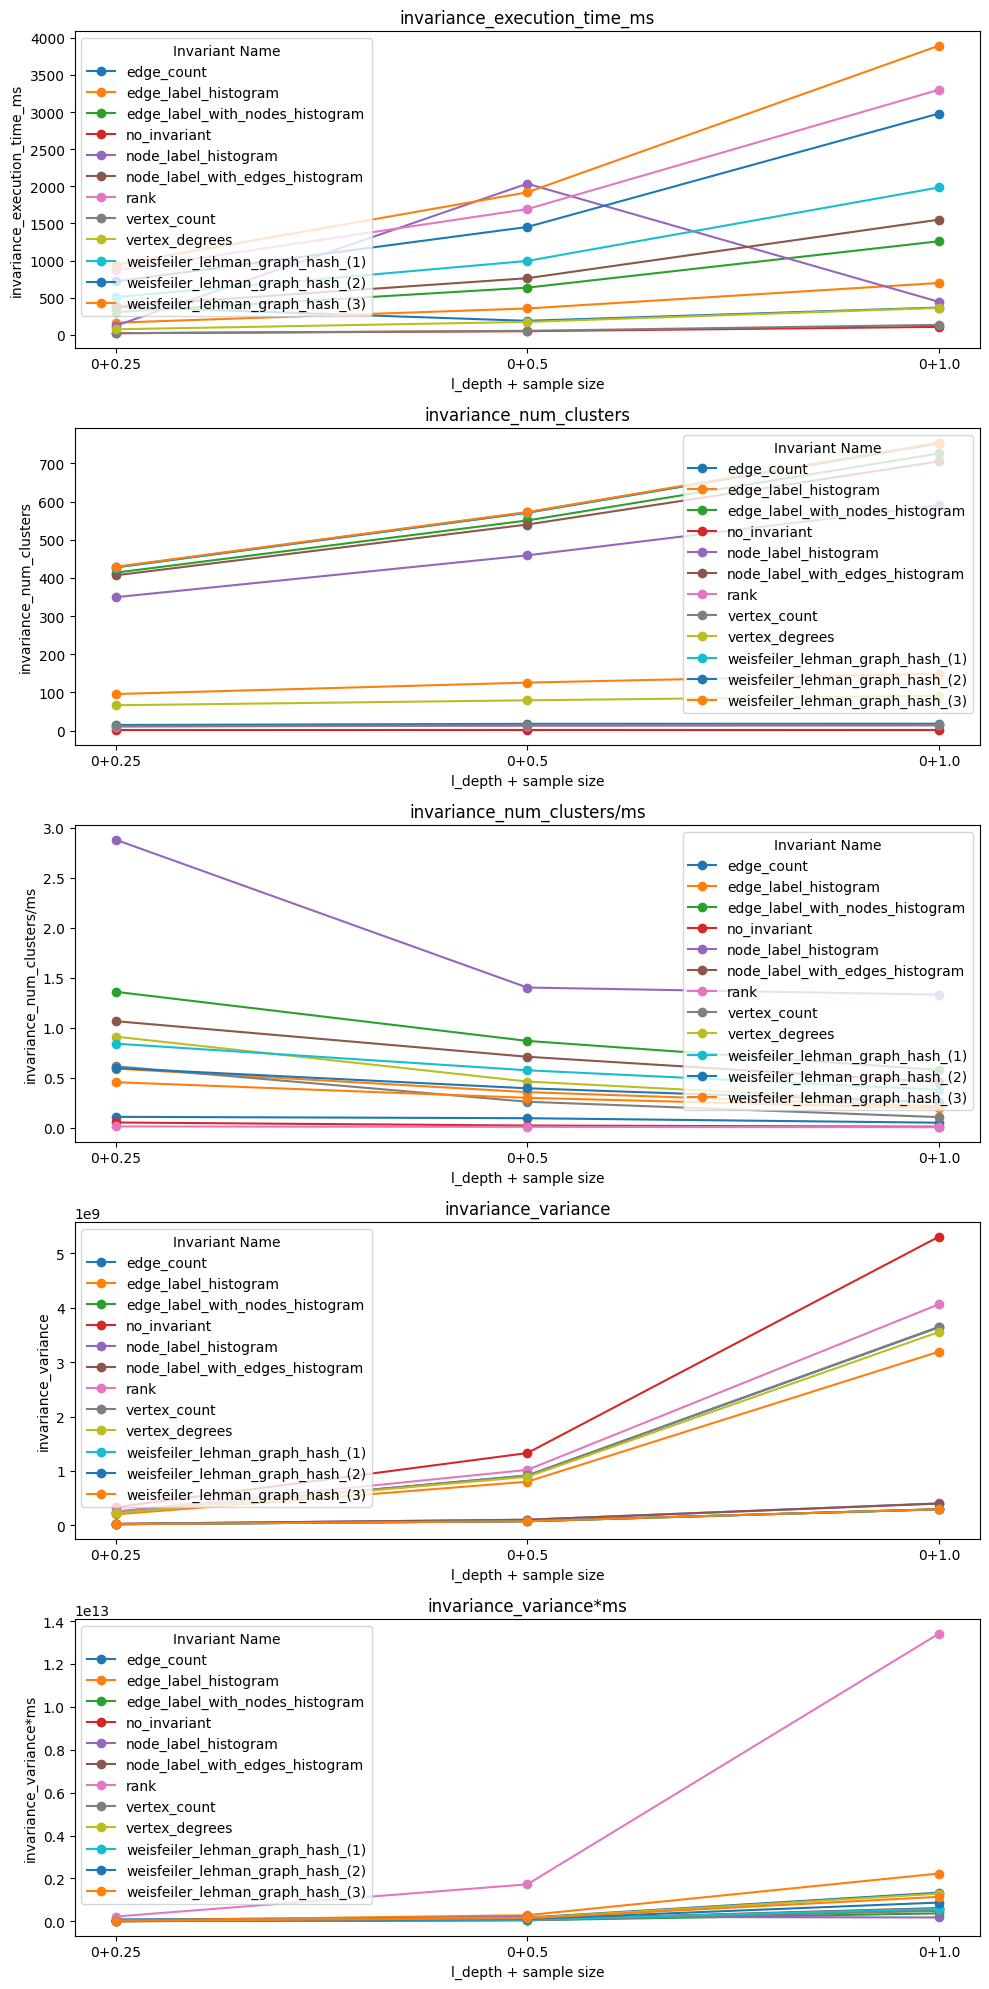

In [33]:
df = grouped_benchmark_df

# Combining 'l_depth' and 'sample_size' into a single column for plotting
df['l_depth_sample'] = df['l_depth'].astype(str) + "+" + df['sample_size'].astype(str)

# List of columns to plot
value_columns = ['invariance_execution_time_ms', 'invariance_num_clusters', 'invariance_num_clusters/ms', 'invariance_variance', 'invariance_variance*ms']

# Creating plots
fig, axes = plt.subplots(nrows=len(value_columns), ncols=1, figsize=(10, 20))

for i, column in enumerate(value_columns):
    for key, grp in df.groupby('invariant_name'):
        axes[i].plot(grp['l_depth_sample'], grp[column], label=key, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel('l_depth + sample size')
    axes[i].set_ylabel(column)
    axes[i].legend(title='Invariant Name')

plt.tight_layout()
plt.show()